In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'axes.grid' : False})

In [8]:
df = pd.read_csv('data_team3 - DIFU.csv')
df = df[['type','topic','label']].dropna()

# split label column into two columns based on the first character
df['numeric_label'] = df['label'].str[0].astype(int)

Text(0.5, 0, 'Guilt')

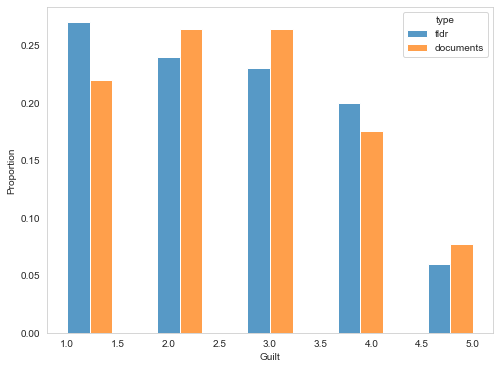

In [10]:
# set figsize
plt.figure(figsize=(8, 6))
sns.histplot(df, x='numeric_label', discrete=False, common_norm=False,
             hue='type', multiple='dodge', stat='proportion')
plt.xlabel("Guilt")

In [14]:
df

,example_id,text,label
0,37_1_1,always pee before sex.,1
1,39_1_1,"ex-gf used me as a place holder, shit on my he...",1
2,40_1_1,"fell for what i thought was someone my age, in...",1
3,41_1_1,"met a girl, visited her, didn't make a move.",3
4,42_1_1,today was a shit day.,2
...,...,...,...
295,395_2_3,so i'm visiting my grandparents and uncle toda...,1
296,397_2_3,okay let's set the scene. i was about halfway ...,2
297,399_2_3,this happened when i was 8 years old. a few fa...,2
298,400_2_3,i work in a community pool and teach swimming ...,3


In [16]:
def split_dataframe(df, target_column, test_size, validation_size, random_state):
    # Split the DataFrame into train and test based on the target column
    train_df, test_df = train_test_split(df, test_size=test_size, stratify=df[target_column], random_state=random_state)

    # Adjust the validation size to maintain balance
    validation_size_adjusted = validation_size / (1 - test_size)

    # Split the train DataFrame into train and validation based on the target column
    train_df, validation_df = train_test_split(train_df, test_size=validation_size_adjusted, stratify=train_df[target_column], random_state=random_state)

    return train_df, validation_df, test_df

In [18]:
# Define the sizes for test and validation sets
test_size = 0.2  # 20% of the data for the test set
validation_size = 0.2  # 20% of the remaining data for the validation set

# Set the random state for reproducibility
random_state = 42

# Split the DataFrame into train, validation, and test DataFrames
train_df, validation_df, test_df = split_dataframe(df, "label", test_size, validation_size, random_state)

In [20]:
print(f"Train length: {len(train_df)}, validation length: {len(validation_df)}, test length: {len(test_df)}")

Train length: 180, validation length: 60, test length: 60


In [ ]:
train_df.to_csv("train.csv", index=False)
validation_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)